# Modèles d'influence bornée

*Sujet d'ARE Dynamic 2018 (Maximilien Danisch, Pierre Fournier, Arthur Guillon, Jean-Daniel Kant, Baptiste Lefebvre, Nicolas Maudet)*

## Introduction

Considérons un ensemble donné d'**individus** que l'on appelera **population**. Chacun de ces individus possède une **opinion**, c'est-à-dire un ensemble de convictions, de valeurs, de jugements, de préjugés et de croyances qui lui sont propres. Naturellement, nous pouvons nous attendre à ce que l'opinion d'un individu donné ne soit pas constamment la même au cours du temps. Au contraire, elle évolue en fonction des **rencontres** faites avec d'autres individus. Lorsque la population est suffisament grande, il est impossible  qu'un individu fasse connaissance avec tout le monde. Dans ce cas, ses rencontres se font avec un sous-ensemble d'individus appartenant à cette population que nous appelerons ses **voisins**.

Dans ce contexte, une question émerge principalement :

* Comment évolueront les opinions des individus au cours du temps ?



Pour être en mesure de proposer une réponse scientifique à cette question, nous allons chercher à modéliser cette **dynamique des opinions**. Autrement dit, nous allons assembler des concepts pour représenter de manière simplifiée cette dynamique en vue de la comprendre et d’en prédire certaines caractéristiques.

Pour commencer, deux questions de modélisations apparaissent immédiatement :

* Comment modéliser l'opinion d'un individu ?
* Comment modéliser le processus de mise à jour de l'opinion de cet individu ?

Dans la première partie de l'ARE, nous allons étudier un modèle en particulier : le **modèle d'influence bornée**. Ce modèle effectue les deux hypothèses suivantes :

* L'opinion d'un individu $ i $ est une valeur réelle (comprise entre $ 0 $ et $ 1 $ inclus), que nous noterons $ x_i $.
* La mise à jour consiste à faire évoluer l'opinion d'un individu $ i $, lorsqu'il rencontre un individu $ j $, en appliquant la formule : $ x_i \leftarrow x_i + \mu \cdot ( x_j - x_i ) $.

Où $ \mu $ est appelé le **paramètre de convergence**. Ce paramètre permet de contrôler la vitesse de convergence des opinions. Sa valeur est comprise entre $ 0 $ et $ 0.5 $.

<!--Prenons une population donnée, discutant à propos d'un <font color='red'>sujet fixe</font>. 
Il est naturel de supposer que chaque individu se forge une opinion au contact de ses voisins. --> 
<!--Deux choix de modélisation apparaissent donc pour commencer :-->
<!--* comment modéliser l'opinion d'un individu ?-->
<!--* comment modéliser le processus de mise à jour de son opinion ?-->

<!--Dans la première partie de cet ARE <font color='red'>vous allez</font> étudier le **modèle d'influence bornée**, qui fait les deux hypothèses suivantes : l'opinion d'un individu $i$ est une valeur réelle (comprise entre 0 et 1), que nous noterons $x_i$, et la mise à jour consiste à faire évoluer l'opinion d'un individu $i$, lorsqu'il rencontre un individu $j$, en appliquant la formule $x_i \leftarrow x_i + \mu \cdot ( x_j - x_i ) $.
Ici $\mu$ est le paramètre qui permet de contrôler la vitesse de convergence des opinions, il est compris entre $0$ et $0.5$.--> 

Pour mieux comprendre, prenons un exemple :

In [9]:
def update_opinion(x, y, mu):
    """Rule to use to update the opinions."""
    
    xpost = x + mu * (y - x)
    ypost = y + mu * (x - y)
    
    return xpost, ypost

In [10]:
x = 0.3
y = 0.8
mu = 0.2
xpost, ypost = update_opinion(x, y, mu)

print("xpost:", xpost)
print("ypost:", ypost)

xpost: 0.4
ypost: 0.7000000000000001


**Question :** Que se passe-t-il lorsque le paramètre $ \mu $ est égal à $ 0.5 $ ?

**Question :** Que se passe-t-il lorsqu'il est égal à $ 0 $ ? 

Une hypothèse importante de notre modèle est donc que les mises à jour sont effectuées en **pair-à-pair**. Il s'agit d'un choix de notre part. Bien d'autres choix sont possibles ! Nous pourrions par exemple supposer qu'un individu choisisse un autre individu et adopte son opinion tel quel. Ou bien qu'il considère les opinions d'un ensemble d'autres individus (par exemple, ses **amis**) et adapte son opinion à la moyenne de leurs opinions.

En effectuant un de ces autres choix nous obtiendrions une **variante** du modèle d'influence bornée. Ces variantes pourront donner lieu à des études dans la suite de l'ARE.

Pour conclure cette introduction, quelque mots concernant ce à quoi nous pouvons nous attendre. En fin de simulation nous pourrons typiquement observer deux types de résultats :
* Un état de **consensus** lorsque tous les agents possèdent la même opinion.
* Un état de **polarisation** lorsque des opinions divergentes subsistent dans le système.

## Modèle d'influence bornée

**Question :** Mais quelle est cette borne dont il est question dans le nom du modèle ?

Il s'agit en fait d'un paramètre qui permet de conditionner le changement ou non de l'opinion d'un individu. Deux individus changeront d'opinions si la différence entre leurs opinions n'est pas trop importante. Ou plus précisement si  la condition suivante est vérifiée : $ | x_i - x_j | < c $. Le paramètre $ c $ est appelé le **seuil** et permet de borner l'influence entre les individus, d'où le nom donné au modèle.

**Question :** Comment modifier la fonction précédente afin de prendre en compte ce nouveau paramètre ?

In [11]:
def bounded_update_opinion(x, y, mu, c):
    """Rule to use to update the opinions."""
    
    # TODO to modify.
    xpost, ypost = update_opinion(x, y, mu)
    
    return xpost, ypost

In [12]:
x = 0.3
y = 0.8
mu = 0.2
c = 0.1
xpost, ypost = bounded_update_opinion(x, y, mu, c)

print("xpost:", xpost)
print("ypost:", ypost)

xpost: 0.4
ypost: 0.7000000000000001


## Dynamique des opinions

À ce stade, il reste une composante importante du modèle à préciser. Il s'agit d'une troisième question de modélisation :

- Comment modéliser les rencontres faites par un individu (i.e. quand et avec qui) ?

Le choix qui sera fait à ce sujet aura un grand impact sur la dynamique des opinions que nous observerons. Il s'agit donc d'une hypothèse importante de notre modèle.

Nous supposons ici que le temps est discret. Les rencontres ont lieu à chaque pas de temps. Plus spécifiquement, nous considérons une dynamique **asynchrone** : chaque paire d'individus donne lieu à une mise à jour de leurs opinions lors de leur rencontres. (Il n'y a pas de synchronisation des mises à jour entre plusieurs paires d'individus).

L'ordre des rencontres pourra être **aléatoire** (par exemple en tirant une paire d'agent de manière uniforme parmi toutes les paires d'agents possibles), ou **déterministe** et fixé à l'avance (par exemple en considérant un **processus round-robin**, dans ce cas chaque individu effectura une mise à jour avec tous ses voisins). 

Enfin, la dynamique peut être **spatialisée**, au sens où les agents ne peuvent rencontrer que certains autres agents. Par exemple, dans le premier exemple que nous considérons ci-dessous, les agents sont disposés sur un cercle: chaque agent peut donc rencontrer deux voisins. 

## Paramètres de votre modèle

En résumé, en plus de la dynamique choisie (i.e. règle de mise à jour et règles de réalisations des rencontres), les paramètres importants de notre modèle sont donc : 
* le nombre d'individu : `N`
* le paramètre de convergence : `mu` 
* le seuil : `c`

In [13]:
# Global parameters
nb_steps = 20
N  = 5        # number of individuals
mu = 0.5      # convergence parameter
c  = 0.2      # threshold

## Exemple : Dynamique aléatoire spatialisée sur un cercle

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Initialisation

Il est possible d'initialiser votre système en créant une liste avec des valeurs tirées de manière uniforme entre $ 0 $ et $ 1 $.

In [15]:
def init_system():
    """Initialize the opinions of the individuals."""
    
    state = np.random.uniform(low=0.0, high=1.0, size=N)
    
    return state

In [16]:
state = init_system()
print("state:", state)

state: [ 0.28516173  0.53220575  0.54801303  0.31445409  0.27386621]


In [17]:
print("state[0]:", state[0])

state[0]: 0.285161728465


### Sélectionner aléatoirement une paire d'agent

Dans ce modèle on va supposer que les rencontres sont aléatoires (alternativement, on pourrait supposer qu'un agent rencontre tour à tour son voisin de droite et son voisin de gauche, par exemple)

In [18]:
def sample_pair_agents():
    """Sample a pair of distinct consecutive agents uniformly."""
    
    x = np.random.choice(N)
    i = x % N
    j = (x + 1) % N

    return i, j

In [19]:
print("(i, j):", sample_pair_agents())

(i, j): (4, 0)


### Passer à l'état suivant

In [20]:
def next_step(state, verbose=False):
    """Simulate the transition from one state to following one."""

    i, j = sample_pair_agents()
#     next_state = state.copy()
    state[i], state[j] = bounded_update_opinion(state[i], state[j], mu, c)
    if verbose:
        print("Agents", i, "and", j, "met.")

    return state

In [21]:
print(next_step(state, verbose=True))

Agents 3 and 4 met.
[ 0.28516173  0.53220575  0.54801303  0.29416015  0.29416015]


### Simulation

Et finalement, nous itérons un certain nombre de pas. 

In [22]:
def simulate(verbose=False):
    """Simulate multiple transitions."""
    
    results =[]
    new_state = init_system()
    for i in range(nb_steps):
        new_state = next_step(new_state)
        if verbose:
            print(i, new_state)
        results.append(new_state.copy())
    
    return results

In [23]:
simulate(verbose=True)

0 [ 0.56894978  0.54525414  0.54525414  0.06689983  0.3049582 ]
1 [ 0.56894978  0.54525414  0.54525414  0.18592901  0.18592901]
2 [ 0.3774394   0.54525414  0.54525414  0.18592901  0.3774394 ]
3 [ 0.46134677  0.46134677  0.54525414  0.18592901  0.3774394 ]
4 [ 0.46134677  0.50330045  0.50330045  0.18592901  0.3774394 ]
5 [ 0.46134677  0.50330045  0.34461473  0.34461473  0.3774394 ]
6 [ 0.41939308  0.50330045  0.34461473  0.34461473  0.41939308]
7 [ 0.46134677  0.46134677  0.34461473  0.34461473  0.41939308]
8 [ 0.46134677  0.40298075  0.40298075  0.34461473  0.41939308]
9 [ 0.44036993  0.40298075  0.40298075  0.34461473  0.44036993]
10 [ 0.44036993  0.40298075  0.40298075  0.34461473  0.44036993]
11 [ 0.44036993  0.40298075  0.40298075  0.34461473  0.44036993]
12 [ 0.44036993  0.40298075  0.37379774  0.37379774  0.44036993]
13 [ 0.44036993  0.38838925  0.38838925  0.37379774  0.44036993]
14 [ 0.44036993  0.38838925  0.38838925  0.37379774  0.44036993]
15 [ 0.44036993  0.38838925  0.3883

[array([ 0.56894978,  0.54525414,  0.54525414,  0.06689983,  0.3049582 ]),
 array([ 0.56894978,  0.54525414,  0.54525414,  0.18592901,  0.18592901]),
 array([ 0.3774394 ,  0.54525414,  0.54525414,  0.18592901,  0.3774394 ]),
 array([ 0.46134677,  0.46134677,  0.54525414,  0.18592901,  0.3774394 ]),
 array([ 0.46134677,  0.50330045,  0.50330045,  0.18592901,  0.3774394 ]),
 array([ 0.46134677,  0.50330045,  0.34461473,  0.34461473,  0.3774394 ]),
 array([ 0.41939308,  0.50330045,  0.34461473,  0.34461473,  0.41939308]),
 array([ 0.46134677,  0.46134677,  0.34461473,  0.34461473,  0.41939308]),
 array([ 0.46134677,  0.40298075,  0.40298075,  0.34461473,  0.41939308]),
 array([ 0.44036993,  0.40298075,  0.40298075,  0.34461473,  0.44036993]),
 array([ 0.44036993,  0.40298075,  0.40298075,  0.34461473,  0.44036993]),
 array([ 0.44036993,  0.40298075,  0.40298075,  0.34461473,  0.44036993]),
 array([ 0.44036993,  0.40298075,  0.37379774,  0.37379774,  0.44036993]),
 array([ 0.44036993,  0.3

### Visualisation

Afin de visualiser la dynamique, il est possible ici de représenter la simulation sous la forme d'un nuage de points (c.f. [`matplotlib.pyplot.scatter`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)). 
En abscisse, nous trouvons les différents pas de temps de la simulation.
Le niveau d'opinion est représenté en ordonnée. 

In [ ]:
%matplotlib inline

results = simulate()
for i in range(nb_steps):
    x = i * np.ones(N)
    y = results[i]
    plt.scatter(x, y, s=2, c='C0')
    plt.xlabel("Iteration")
    plt.ylabel("Opinion")

## Variante 1 : Dynamique déterministe avec graphe complet

Dans le cas du cercle, la dynamique étudiée était aléatoire, et les interactions fortement restreintes. 

Dans cette première variante, vous devez modifier ces deux hypothèses (en supposant que chaque agent effectue tour à tour une mise à jour avec tous les autres individus) et étudier le comportement de votre modèle en variant les autres paramètres du modèle. Plus précisément, vous pourrez considérer les variantes suivantes: 
* Chaque agent (dans l'ordre) rencontre tous les autres agents (dans l'ordre).
* Un agent choisi au hasard (i.e. uniformément) rencontre tous les autres agents (dans l'ordre).
* Un agent choisi au hasard (i.e. uniformément) rencontre tous les autres agents (dans le désordre).




In [ ]:
# TODO to complete.

## Variante 2 : Dynamique aléatoire spatialisée sur une grille

Pour cette seconde variante, vous supposerez que les individus sont disposés sur une grille à deux dimensions. Les rencontres doivent être effectuées de manière aléatoire. Vous devrez également obtenir une visualisation graphique de l'évolution des opinions (c.f. figure ci-dessous). 

![state-grid-uniform-convergence](state-grid-uniform-convergence.gif)

**Indication** : Il est recommandé d'utiliser une matrice pour représenter le système.

In [31]:
#TODO à compléter

**Aide** : Afin de visualiser la dynamique du système, on pourra utiliser sans le modifier le code suivant

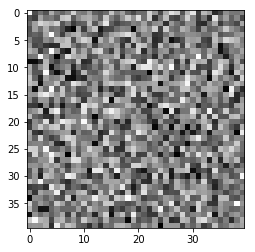

In [44]:
fig = plt.figure()

# results[i] contient l'état au pas de temps i sous forme de matrice
im = plt.imshow(results[0], animated=True)

def updatefig(i):
    im.set_array(results[i+1])
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=1000, interval=50, blit=True)
HTML(ani.to_html5_video())
# Pour sauvegarder la vidéo dans un fichier externe
# ani.save('test.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

## Extensions

Idées d'extensions possibles du modèle: 
* agents têtus (changent moins facilement d'avis) et/ou extrêmistes (initialisés avec une valeur 0/1)
* influence du temps sur la dynamique

...

## Références

Le modèle d'influence bornée a été proposé par : 
* [Deffuant, Guillaume, et al. Mixing beliefs among interacting agents. Advances in Complex Systems 3.01n04 (2000): 87-98.](http://wwwlisc.clermont.cemagref.fr/imagesproject/finalreport/mixbel.pdf) 
* [Hegselmann, Rainer, and Ulrich Krause. Opinion dynamics and bounded confidence models, analysis, and simulation. Journal of artificial societies and social simulation 5.3 (2002).](http://jasss.soc.surrey.ac.uk/5/3/2/2.pdf)

Dans le cas où les opinions des agents sont discrètes, en particulier binaires, on parle généralement de **modèle de votant** (ou **voter model**  en anglais) (c.f.[Bryan Gillespie's app](https://math.berkeley.edu/~bgillesp/apps/voter/)).